# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

#TODO Do samodzielnej implementacji

import ainvert

In [2]:
from ainvert import A_invert
I = cv2.imread('parrot.bmp')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

def zad_dom(I, scale_x, scale_y):
    def dx(ix, jx):
        if ix-1 < 0 or ix+1 > X-1:
            return 0
        return (I[ix+1, jx] - I[ix-1, jx]) / 2
    def dy(ix, jy):
        if jy-1 < 0 or jy+1 > Y-1:
            return 0
        return (I[ix, jy+1] - I[ix, jy-1]) / 2
    def dxy(ix,jy):
        if ix-1 < 0 or ix+1 > X-1 or jy-1 <0 or jy+1 > Y-1:
            return 0
        return (I[ix+1, jy+1] - I[ix-1, jy] - I[ix,jy-1] + I[ix,jy]) / 4
    
    X, Y = I.shape
    X_s, Y_s = int(X * scale_x), int(Y * scale_y)
    I = I.astype(np.int32)
    I_inter = np.zeros((X_s, Y_s), dtype=np.int32)
    
    for i in range(X_s):
        for j in range(Y_s):
            # Punkty ABDC
            A = (int(i / scale_x), int(j / scale_y))
            B = (A[0], min(A[1] + 1, Y-1))
            D = (min(A[0] + 1, X-1), A[1])
            C = (min(A[0] + 1, X-1), min(A[1] + 1, Y-1))
            
            # Pochodne cząstkowe punktów ABDC
            Ax, Ay, Axy = dx(*A), dy(*A), dxy(*A)
            Bx, By, Bxy = dx(*B), dy(*B), dxy(*B)
            Dx, Dy, Dxy = dx(*D), dy(*D), dxy(*D)
            Cx, Cy, Cxy = dx(*C), dy(*C), dxy(*C)
            
            # Macierz x 
            x = np.array([
                I[A], I[B], I[D], I[C], 
                Ax, Bx, Dx, Cx,
                Ay, By, Dy, Cy, 
                Axy, Bxy, Dxy, Cxy 
            ], dtype=np.float64).T
            
            # Równanie a =  A^-1 * x
            a = np.dot(A_invert, x)
            
            # Zmiana rozmiaru a na macierz 4x4
            a = a.reshape((4, 4)).T
            
            # x i y potrzebne do wzoru, wartość ucięta przez int()
            x_i, y_i = i / scale_x - A[0], j / scale_y - A[1]
            
            res = 0
            # Podstawienie do wzoru
            for k in range(4):
                for l in range(4):
                    res += a[l][k] * x_i**k * y_i**l
                    
            I_inter[i, j] = max(0, min(255, res))
            
    return I_inter

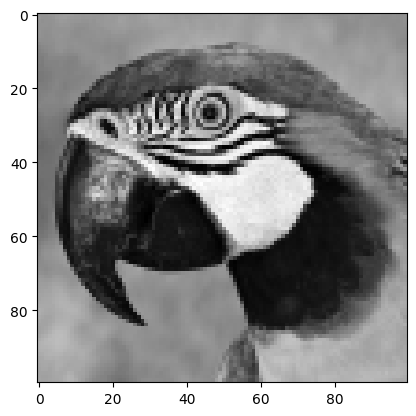

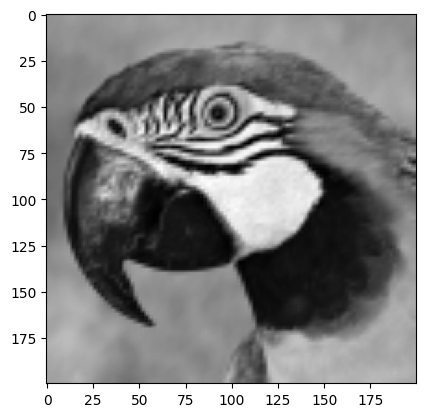

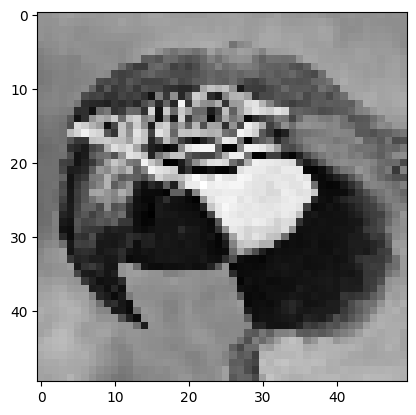

In [3]:
plt.imshow(I, cmap='gray')
plt.show()
plt.imshow(zad_dom(I, 2, 2), cmap='gray')
plt.show()
plt.imshow(zad_dom(I, 0.5, 0.5), cmap='gray')
plt.show()

Porównanie liczby operacji arytmetycznych i dostępów do pamięci na każdy piksel

Interpolacja dwuliniowa
 - Operacje arytmetyczne: 20
 - Liczba dostępów do pamięci: 8 

Interpolacja dwusześcienna
 - Operacje arytmetyczne: 182
 - Liczba dostępów do pamięci: 32